# Gaussian Blur on Medical Images

### Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

## Displaying the Image

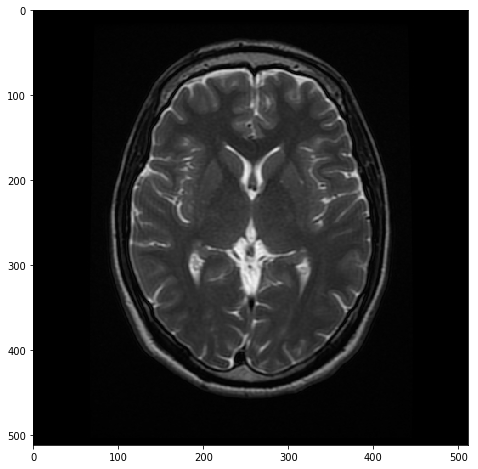

In [2]:
# Read in the image
image = cv2.imread('images/brain_MR.jpg')

# Make a copy of the image
image_copy = np.copy(image)

# Displaying the Image
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)
plt.figure(figsize = (8,8))
plt.imshow(image_copy);

### Applying Gaussian Blur

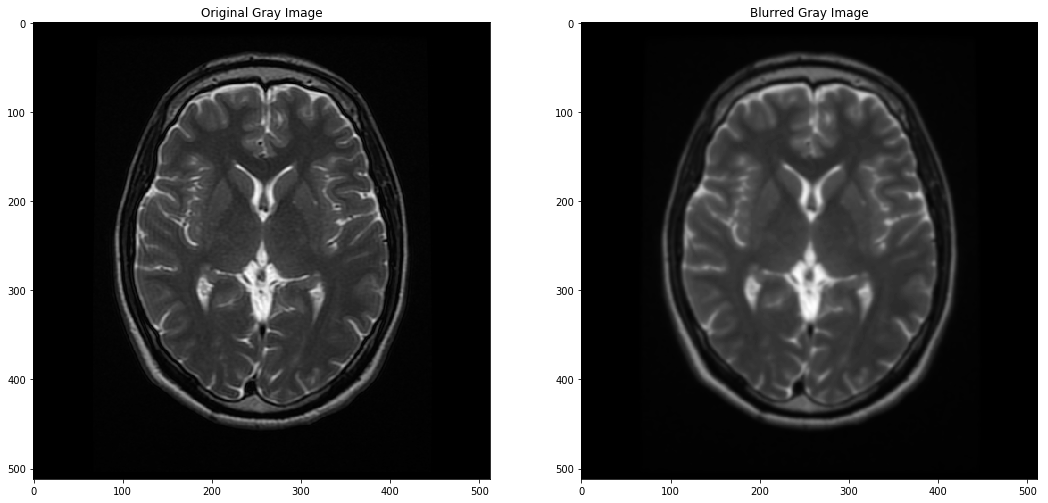

In [3]:
# Convert to grayscale for filtering
gray = cv2.cvtColor(image_copy, cv2.COLOR_RGB2GRAY)

# Create a Gaussian blurred image
gray_blur = cv2.GaussianBlur(gray, (9, 9), 0)

# Displaying the Images
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,10))
ax1.set_title('Original Gray Image')
ax1.imshow(gray, cmap='gray');
ax2.set_title('Blurred Gray Image')
ax2.imshow(gray_blur, cmap='gray');

### Applying the High-Pass Filter

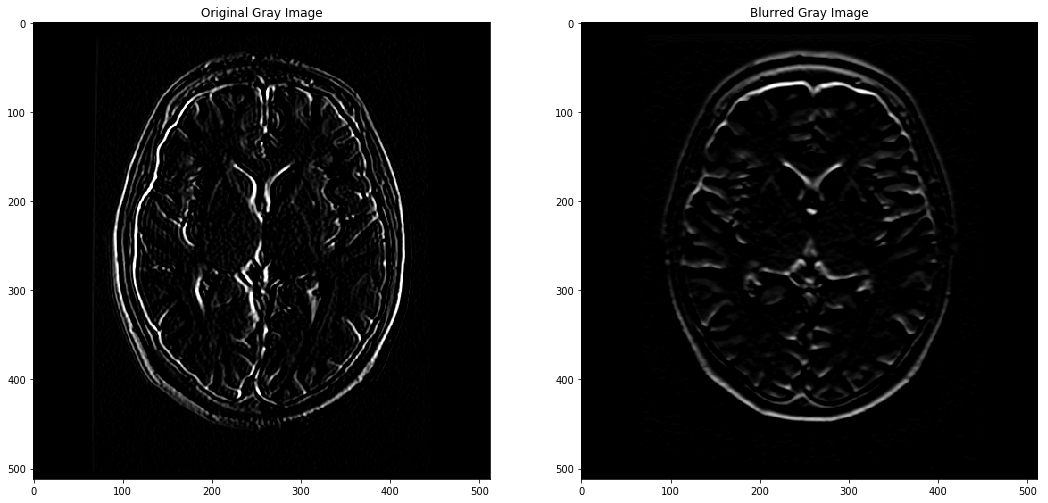

In [4]:
# Defining 3x3 sobel filters for edge detection
sobel_x = np.array([[ -1, 0, 1], 
                   [ -2, 0, 2], 
                   [ -1, 0, 1]])


sobel_y = np.array([[ -1, -2, -1], 
                   [ 0, 0, 0], 
                   [ 1, 2, 1]])


# Applying the Filter
filtered = cv2.filter2D(gray, -1, sobel_x)
filtered_blurred = cv2.filter2D(gray_blur, -1, sobel_y)

# Displaying the Images
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,10))
ax1.set_title('Original Gray Image')
ax1.imshow(filtered, cmap='gray');
ax2.set_title('Blurred Gray Image')
ax2.imshow(filtered_blurred, cmap='gray');

### Creating a Binary Image

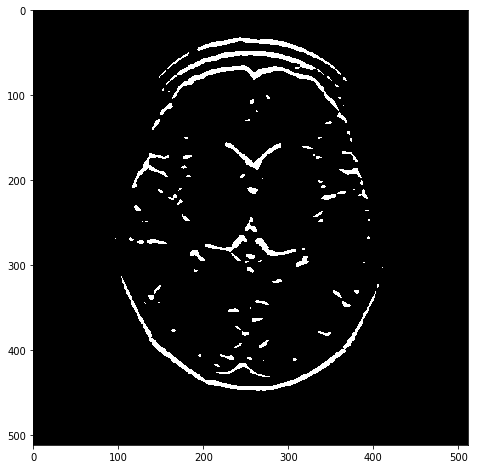

In [5]:
# Applying Threshold to the Filtered Blurred Image
_, binary_image = cv2.threshold(filtered_blurred, 50, 255, cv2.THRESH_BINARY)

# Displaying the Image
plt.figure(figsize = (8,8))
plt.imshow(binary_image, cmap='gray');